<a href="https://colab.research.google.com/github/kalinkabel/Vis-o_Computacional/blob/main/Segmentacao_contorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentação baseada em bordas**

In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib  import pyplot as plt
import numpy as np

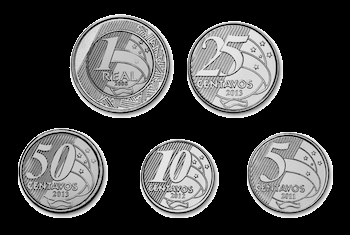

In [67]:
img = cv.imread('/content/drive/MyDrive/Modulo2/Modulo2/imagens/moedas.png',cv.IMREAD_GRAYSCALE)
cv2_imshow(img)

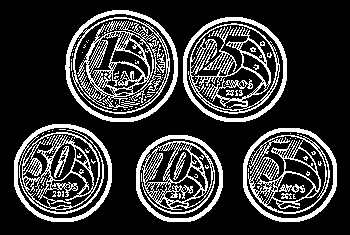

In [70]:
#processasndo imagem com limiarização adaptativa e binarização invertida.
adpt_gauss = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV,11,3)
cv2_imshow(adpt_gauss)

In [71]:
# funcao que retorna as segmentações de bordas com funções morfológicas 
def segmentacao_bordas(img):
 #desfoque = cv.GaussianBlur(img,(7,7),0)
 kernel = np.ones((3,3),np.uint8)
 erosao = cv.morphologyEx(img,cv.MORPH_OPEN,kernel)
 dilatacao = cv.morphologyEx(img,cv.MORPH_CLOSE,kernel)
 gradiente = cv.morphologyEx(img,cv.MORPH_GRADIENT,kernel)

 imagens = [img, erosao,dilatacao,gradiente]
 titulos = ['Imagem original', 'Abertura', 'Fechamento', 'Gradiente']

 fig = plt.gcf()
 fig.set_size_inches(18, 12)

 for i in range(4):
      plt.subplot(2,2,i+1)
      plt.imshow(cv.cvtColor(imagens[i], cv.COLOR_BGR2RGB), 'gray')
      plt.title(titulos[i])
      plt.xticks([]),plt.yticks([]) 
      plt.subplots_adjust(wspace=0.1) 

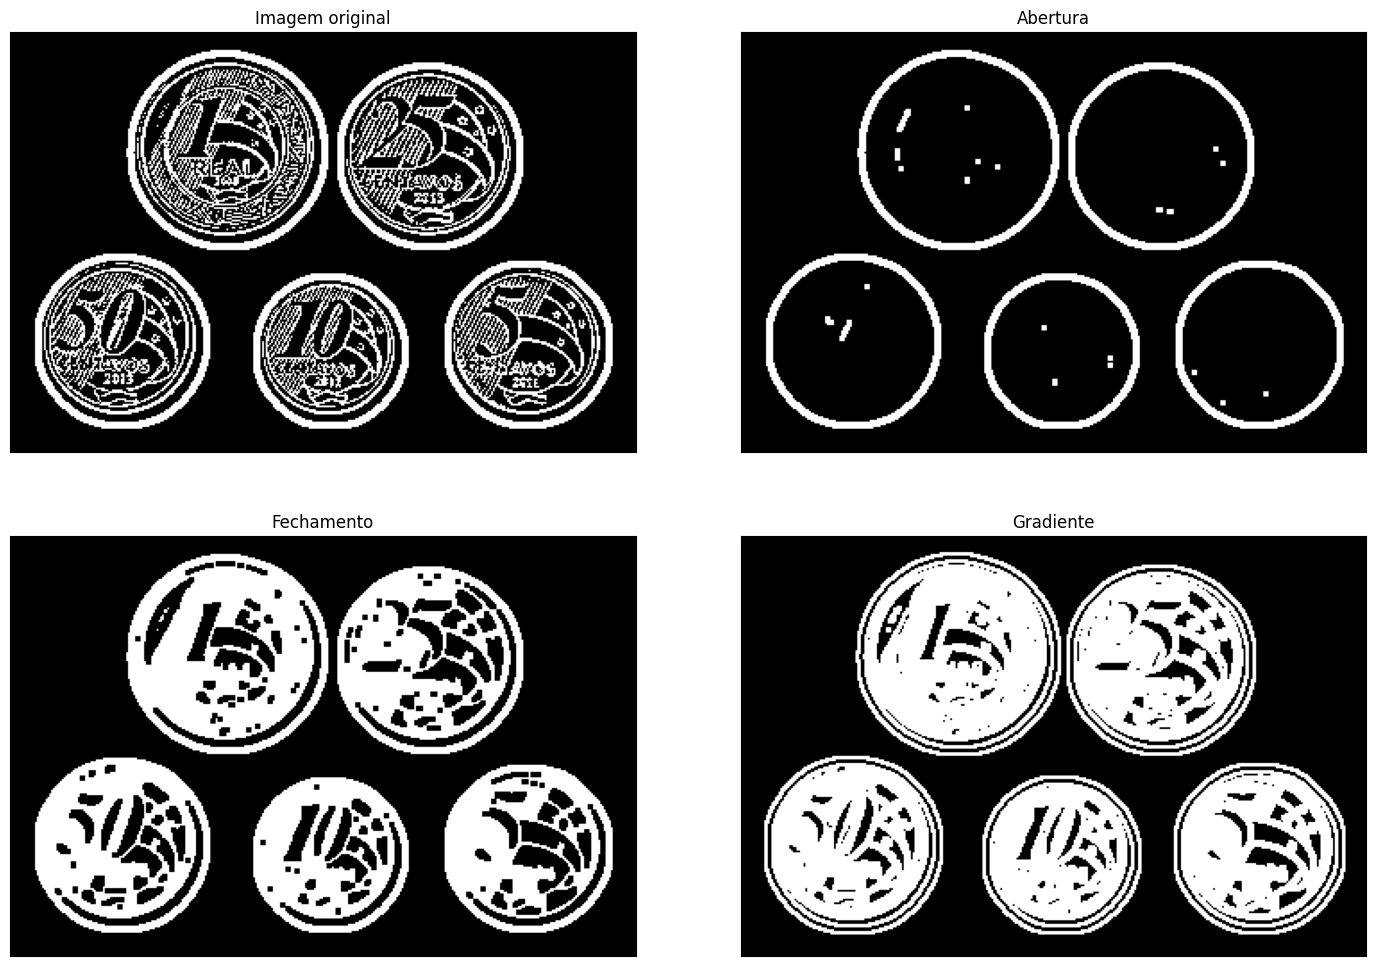

In [72]:
segmentacao_bordas(adpt_gauss)

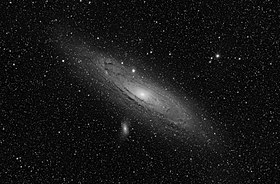

In [73]:
img2 = cv.imread('/content/drive/MyDrive/Modulo2/Modulo2/imagens/andromeda.jpg', cv.IMREAD_GRAYSCALE)
cv2_imshow(img2)

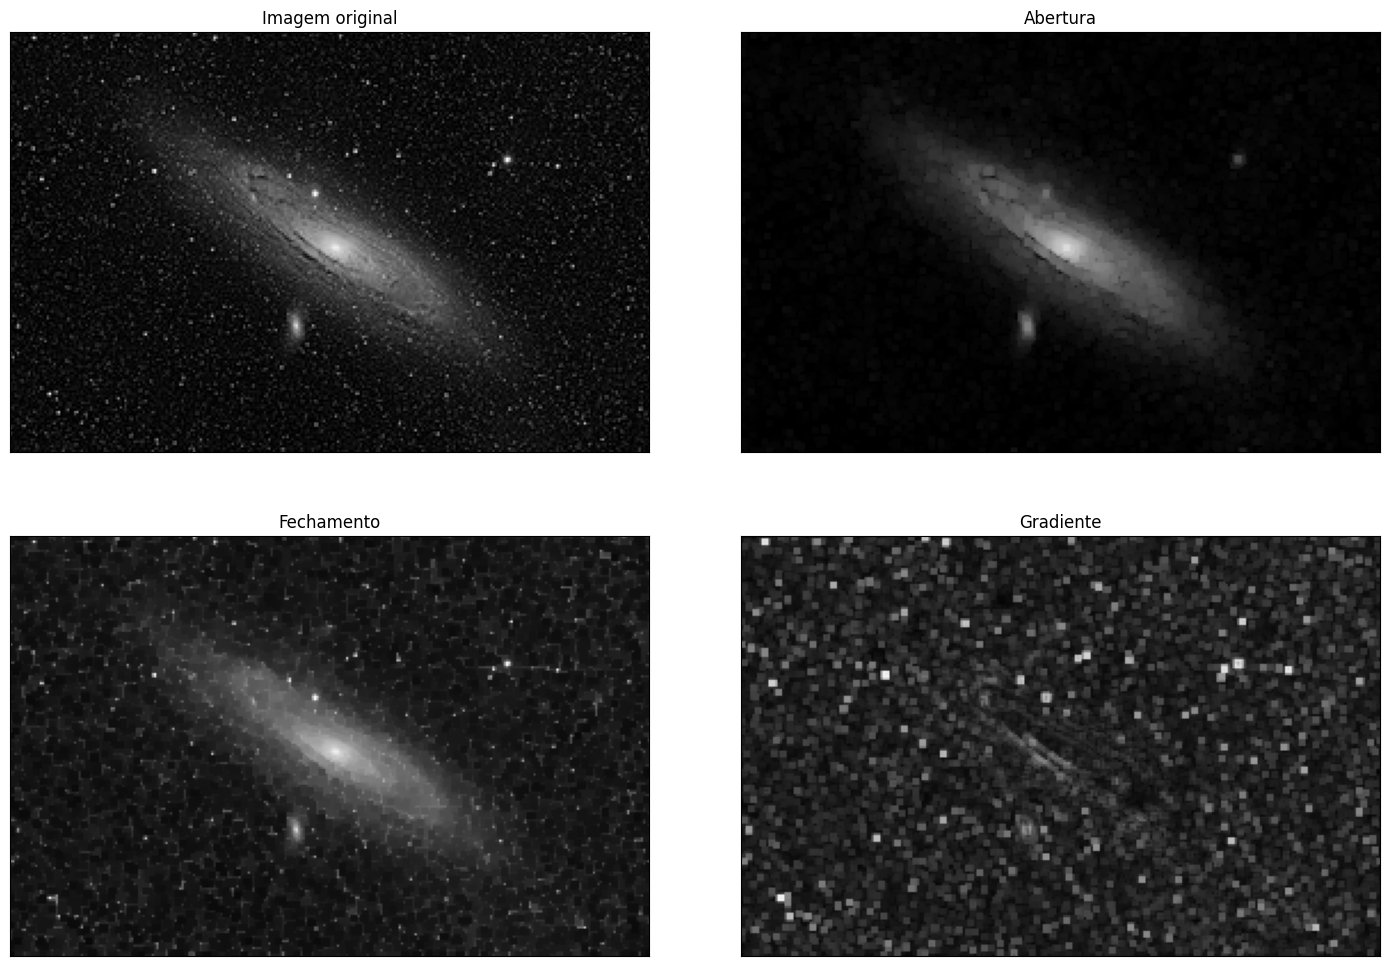

In [74]:
segmentacao_bordas(img2)

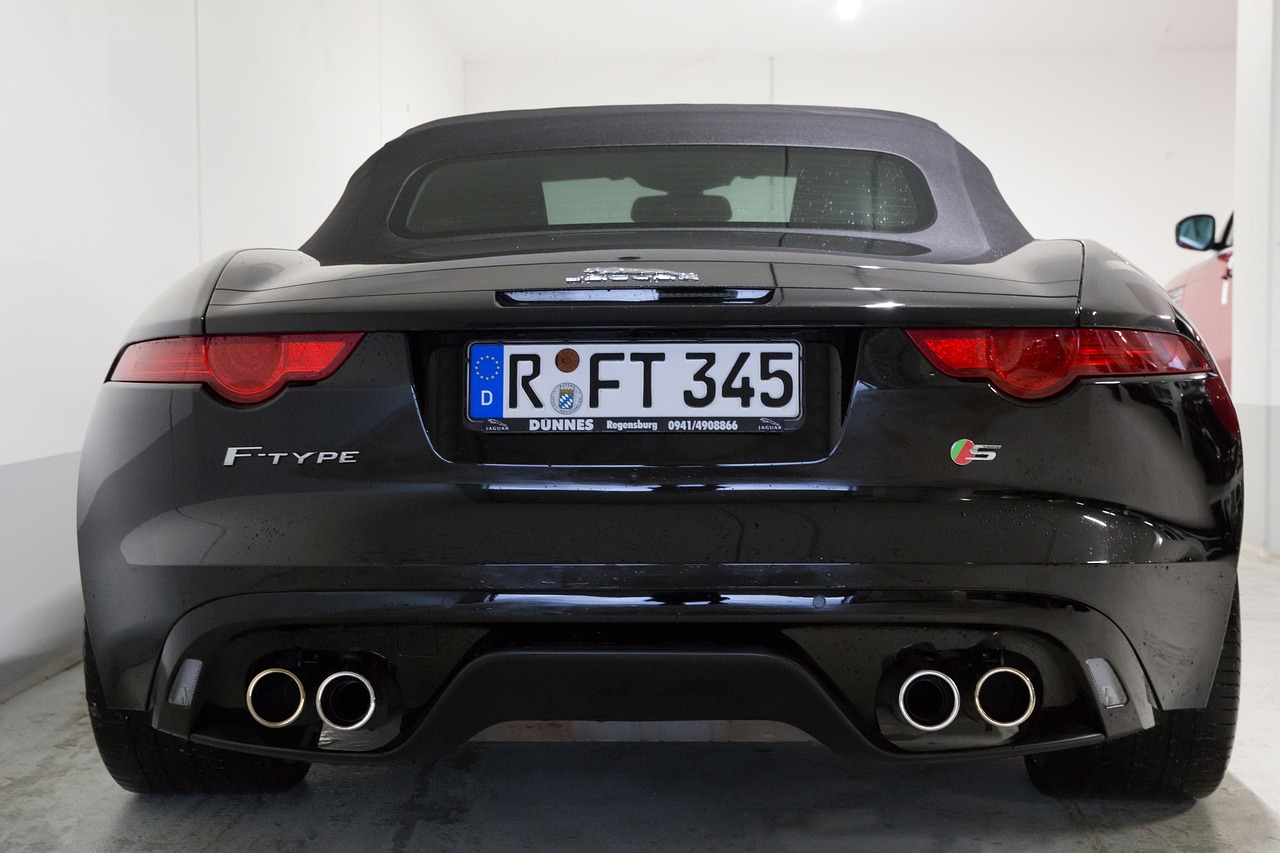

In [15]:
img_car = cv.imread('/content/drive/MyDrive/Modulo2/imagens/jaguar-1076205_1280.jpg')
cv2_imshow(img_car)

In [16]:
#MORPH_TOPHAT: Original menos abertura;
img_car_tophat = cv.morphologyEx(img_car,cv.MORPH_TOPHAT, np.ones((40,40),np.uint8))

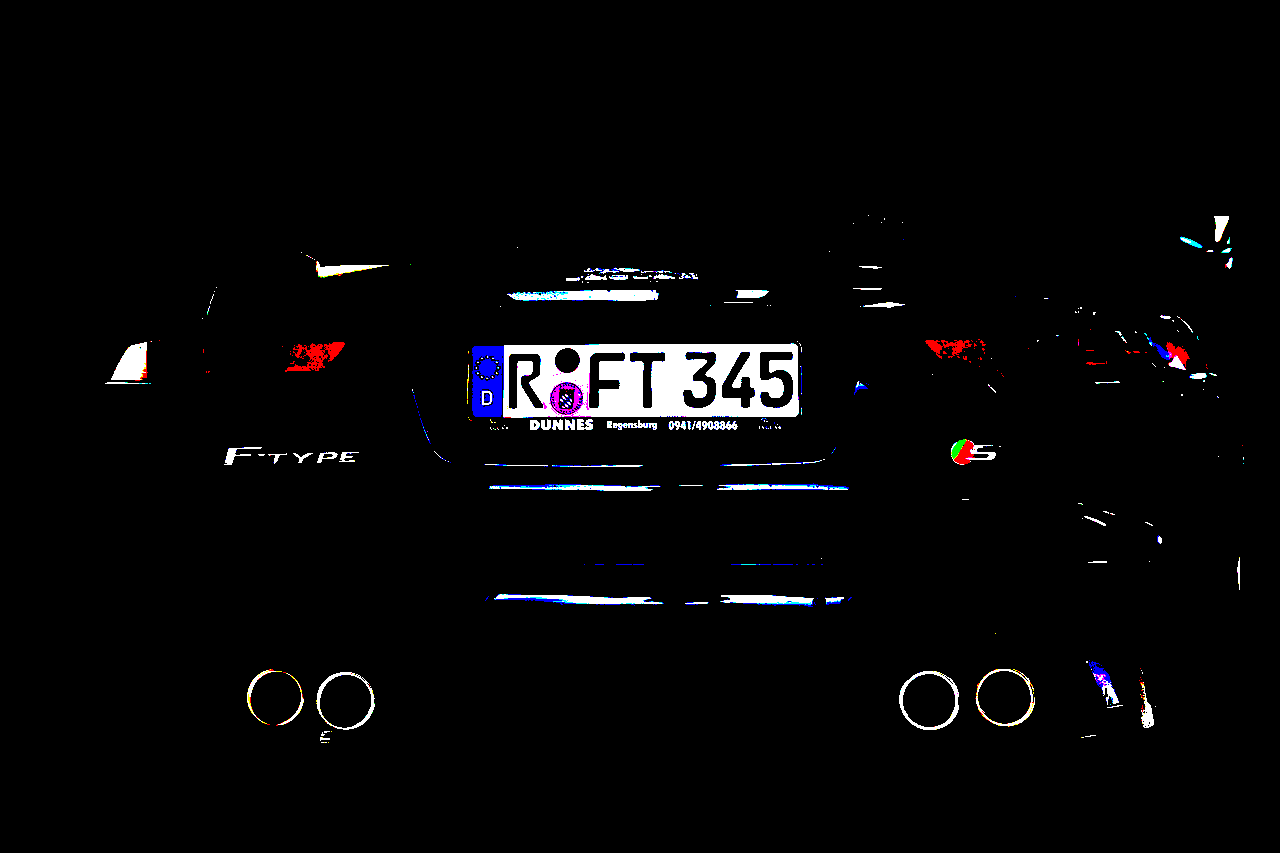

In [17]:
threshold,adpt_gauss1 = cv.threshold(img_car_tophat, 127, 255,cv.THRESH_BINARY)
cv2_imshow(adpt_gauss1)

In [18]:
#MORPH_BLACKHAT: Fechamento menos original;
img_car_black =cv.morphologyEx(img_car, cv.MORPH_BLACKHAT,np.ones((15,15),np.uint8))

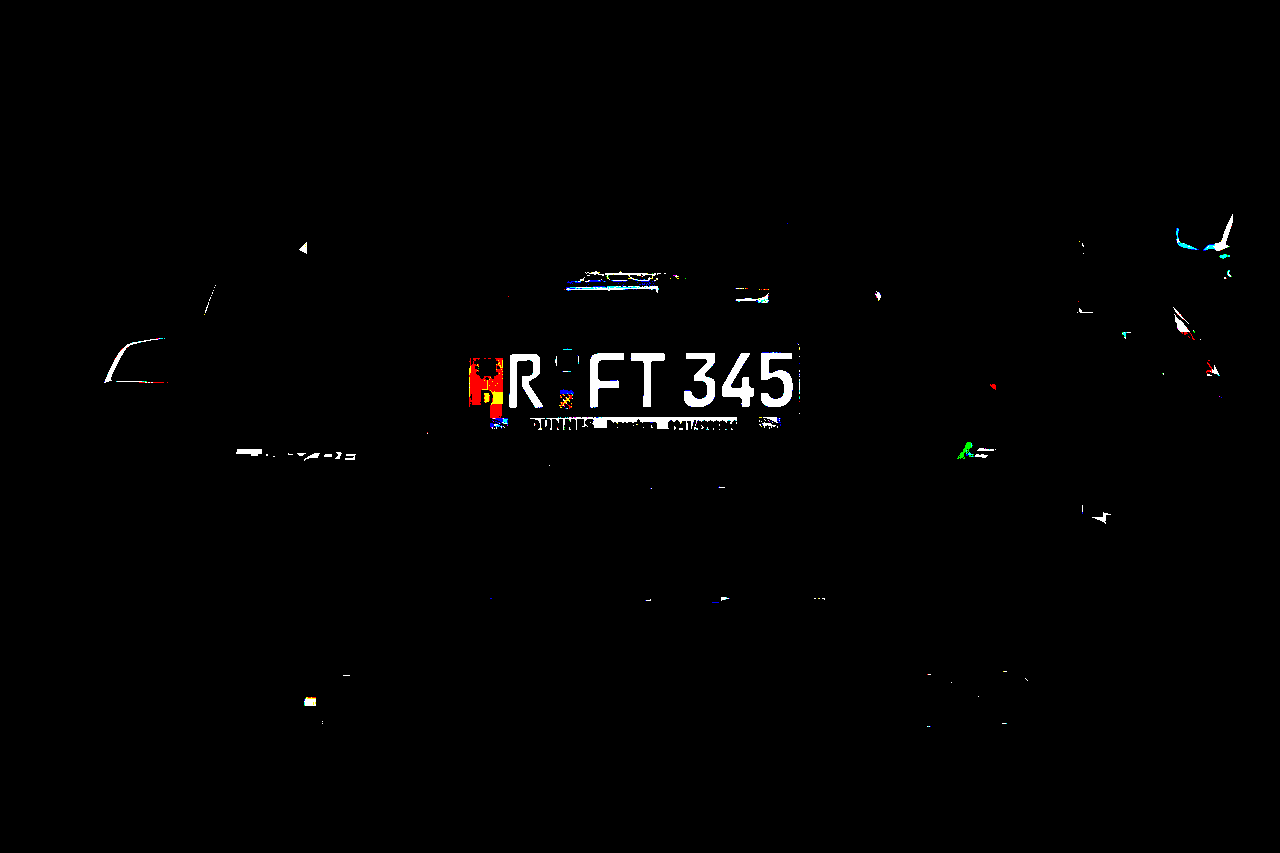

In [19]:
threshold,adpt_gauss1 = cv.threshold(img_car_black, 127, 255,cv.THRESH_BINARY)
cv2_imshow(adpt_gauss1)

**Sobel e Canny Edge**

In [82]:
#função que retorna segmentação de bordas Sobel e Canny
def segmentacoes_bordas(img):

  sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
  sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
  sobel_x = cv.convertScaleAbs(sobel_x)
  sobel_y = cv.convertScaleAbs(sobel_y)
  sobel = cv.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=0)

  canny = cv.Canny(img, 80,140)
  kernel = np.ones((3,3),np.uint8)
  dilatacao = cv.dilate(canny, kernel, iterations=2)
  erosao = cv.erode(dilatacao, kernel, iterations=1)

  imagens = [ img, sobel, canny, erosao]
  titulos = ['Imagem Original', 'Sobel', 'Canny Edge', 'Canny + Fechamento']

  fig = plt.gcf()
  fig.set_size_inches(18,12)

  for i in range(4):
      plt.subplot(2,2,i+1)
      plt.imshow(cv.cvtColor(imagens[i], cv.COLOR_BGR2RGB), 'gray')
      plt.title(titulos[i])
      plt.xticks([]),plt.yticks([]) 
      plt.subplots_adjust(wspace=0.1) 


In [54]:
img_thermal01 = cv.imread('/content/drive/MyDrive/Modulo2/imagens/thermal01.jpg',cv.IMREAD_GRAYSCALE)

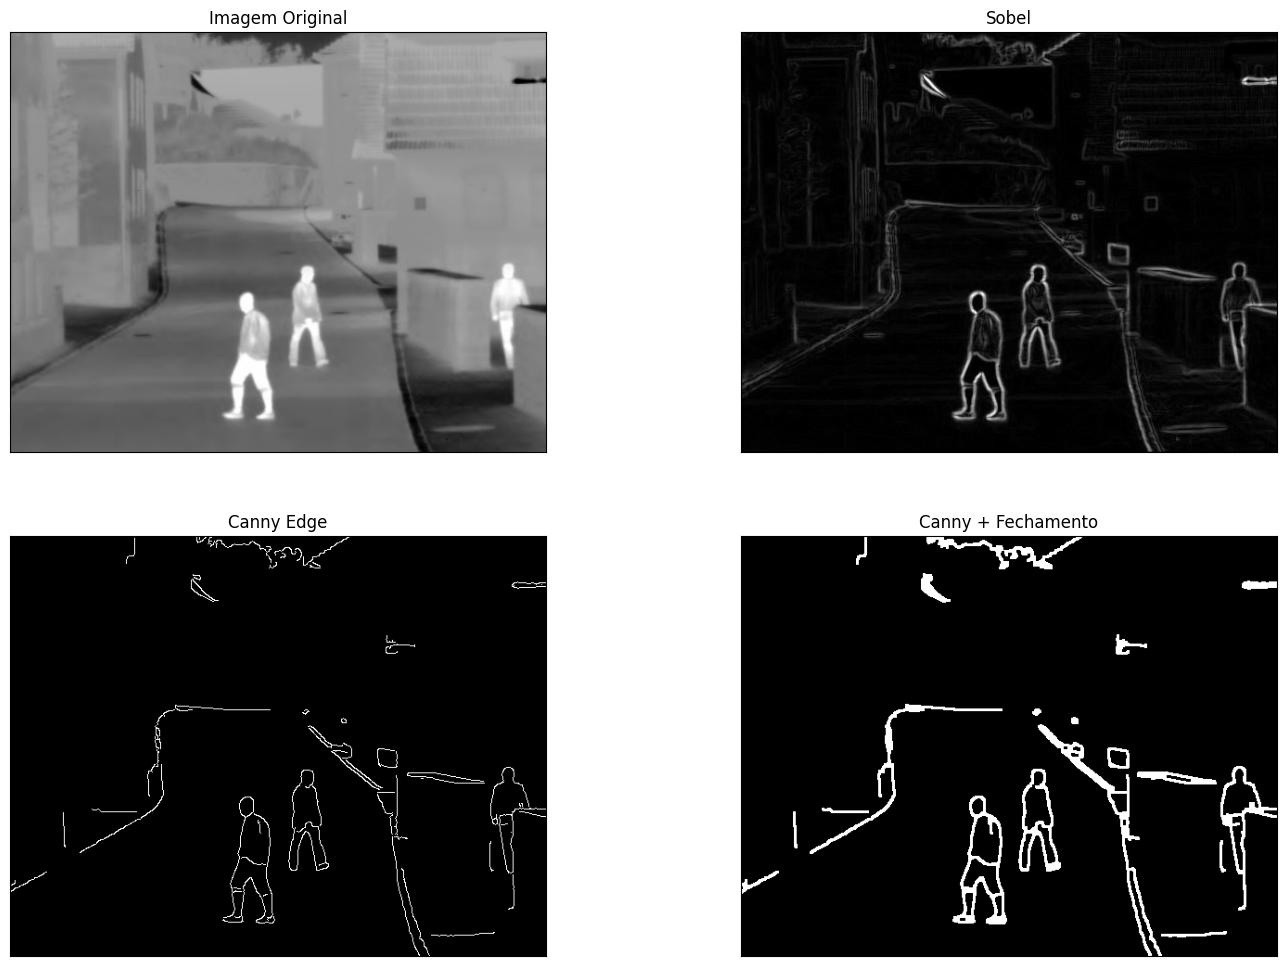

In [83]:
segmentacoes_bordas(img_thermal01)

In [75]:
img_estrada = cv.imread('/content/drive/MyDrive/Modulo2/imagens/estrada.jpg',cv.IMREAD_GRAYSCALE)

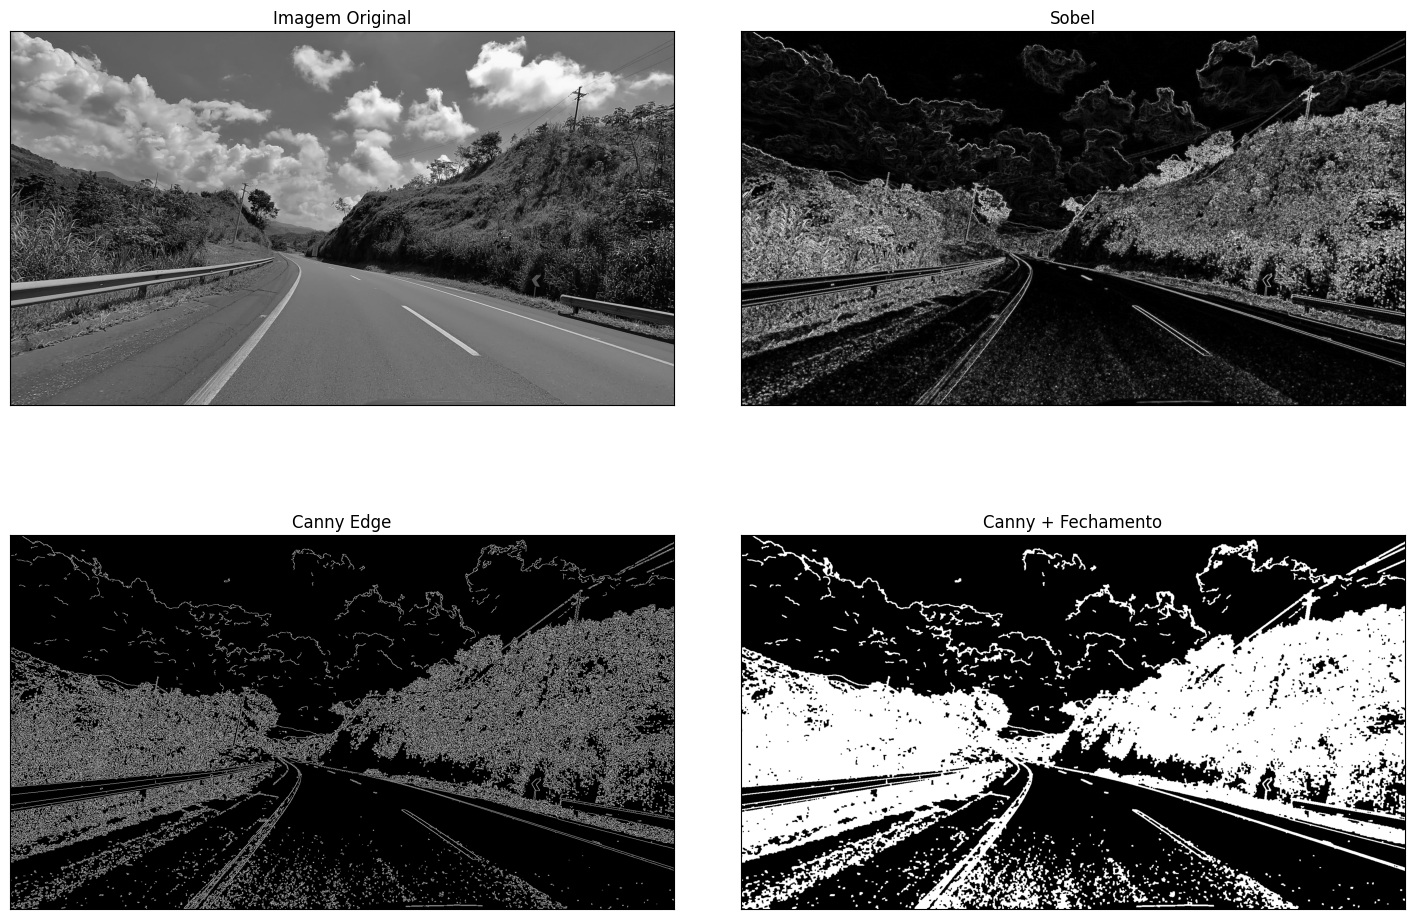

In [84]:
segmentacoes_bordas(img_estrada)

# **Segmentação Contorno**

In [85]:
#Modo de coleta de objetos RETR_EXTERNAL para contornos mais externos e método de aproximação CHAIN_APPROX_SIMPLE retornando apenas os pontos das bordas. 
elementos = adpt_gauss.copy()
contornos,hierarquia = cv.findContours(elementos, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
print(contornos)

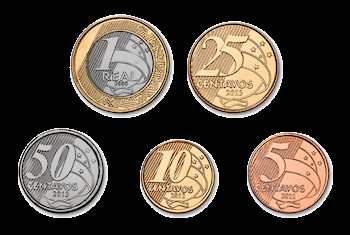

In [87]:
img1 = cv.imread('/content/drive/MyDrive/Modulo2/Modulo2/imagens/moedas.png')
cv2_imshow(img1)

6010.5
7032.5
7631.0
8657.5
9892.0


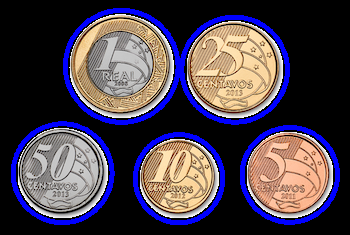

In [88]:
img_processada = img1.copy()
for cnt in contornos:
  area = cv.contourArea(cnt)
  if area >= 1000:
    print(area)
    elipse = cv.fitEllipse(cnt)
    cv.ellipse(img_processada,elipse, (255,0,0),3)
cv2_imshow(img_processada)

**Sobreposição com limiar adaptativo**

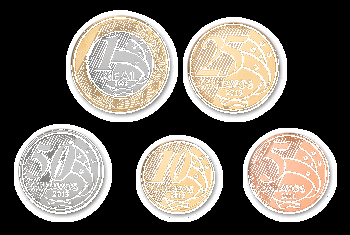

In [89]:
adapt_gauss = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 15, 11)
sobrepor = cv.add(img1, cv.cvtColor(adapt_gauss, cv.COLOR_GRAY2BGR))
cv2_imshow(sobrepor)